# Linear Regression
## PortugalBankingAnalytics
#####  By: Gona Naga Sathwik Reddy

**Problem Statement** 
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

**Dataset Description:**

Bank client data

1.**age** (numeric)

2.**job**:typeofjob(categorical:'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

3.**marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4.**education**: (categorical "unknown","secondary","primary","tertiary")

5.**default**: has credit in default? (binary: "yes","no")

6.**balance**: average yearly balance, in euros (numeric) 

7.**housing**: has housing loan? (binary: "yes","no")

8.**loan**: has personal loan? (binary: "yes","no")
 

Data related to the last contact of the current campaign

1.**contact**: contact communication type (categorical: "unknown","telephone","cellular")

2.**day**: last contact day of the month (numeric)

3.**month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

4.**duration**: last contact duration, in seconds (numeric)
 

Other attributes:

1.**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

2.**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client            was not previously contacted)

3.**previous**: number of contacts performed before this campaign and for this client (numeric)

4.**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 

Output variable (desired target):

**y**: has the client subscribed a term deposit? (binary: "yes","no")
 

**Objectives:**

You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

1.Clean the data and drop useless columns.

2.Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features,   remove outliers and correlated variables if necessary.

3.Visualize the distributions of various features and correlations between them.

4.Perform feature engineering to extract the correct features for the model.

5.Build a logistic regression model

6.Evaluate the model used.

 
**Model Evaluation:**

When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use **y_test and y_pred.**

where **y_test** is the test data set for the target variable, and **y_pred** is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

**Dataset:**

* File Name "bank" contains information related to direct marketing campaigns of a banking institution, where the primary mode     of contact is phone calls. The goal seems to be predicting whether a client will subscribe to a term deposit, as indicated by   the 'y' column. 

Let's Begin by importing all the required library packages !!

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
data= pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# **Hypothesis Questions:**

1.Are retired people more likely to subscribe for term deposits? This may be true as usually retired people prefer safe investments in form of fixed deposits rather than other risky investments.

2.Do salaried people prefer it more than business owners and entrepreneurs? This may be true as it is reasonable to think business people would invest money back into their business rather than putting it in banks.

3.Are married people more likely to subscribe for the term deposits? This may be true as married people often tend to ensure savings for their family.

4.If you already have loans, would you be less likely to subscribe to term deposits?

5.Are younger customers more likely to subscribe to a term deposit compared to old customers (age>60) ?




# **Exploratory Data Analysis:**

1. Brief Look at the Dataset
2. See the dataset shape.
3. See the variables datatypes.
4. Target Distribution.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


We will do the appropriate conversion to numeric data before passing to our ML Models.

In [76]:
print(f'Data contains {data.shape[0]} samples and {data.shape[1]} variables')

#ID_col=
TARGET_COL='y'

#features = [c for c in data.columns if c not in [ID_COL, TARGET_COL]]
features = [c for c in data.columns if c not in [TARGET_COL]]
print(f'\nThe dataset contains {len(features)} input features')


Data contains 4521 samples and 17 variables

The dataset contains 16 input features


In [77]:
#Distribution of the Target Feature: 'y' - has the client subscribed a term deposit? (binary: 'yes', 'no')

data[TARGET_COL].value_counts(normalize='True') #normalise='True' returns % according to frequency

no     0.88476
yes    0.11524
Name: y, dtype: float64

Text(0.5, 1.0, 'Target Distribution')

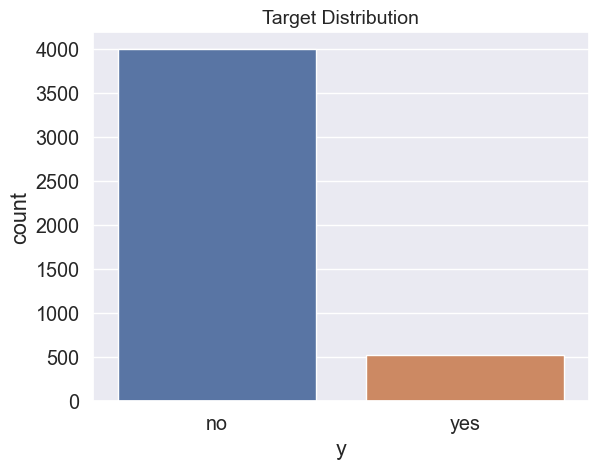

In [78]:
sns.countplot(data=data, x=TARGET_COL)
plt.title('Target Distribution', fontsize=14)

It is a highly imbalanced dataset which was expected as with every marketing campaign.

In [79]:
#Checking percentage of null values for each column
#null_values_per_variable = 100 * (data.isnull().sum()/data.shape[0]).round(3)#.reset_index()
#null_values_per_variable.sort_values(ascending=False)

In [80]:
#Check for Null Values
data[features].isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [81]:
#removal of duplicate rows
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(4521, 17)
(4521, 17)


There are no null values in any column.

In [82]:
#Checking Unique values in each variable
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

The features 'age', 'duration', 'campaign', 'pdays', contain a lot of unique values.

**Analyzing Each Variable & their Relationships**

For each feature type we will be perform two types of analysis:

Univariate: Analyze 1 feature at a time

Bivariate: Analyze the relationship of that feature with target variable, 'y'

In [83]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [84]:
#Segregating Categorical & Numerical Variables
cat_cols = ['job','marital','education','default','housing','loan','contact','day','month', 'poutcome']

num_cols = [c for c in features if c not in cat_cols]
num_cols

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

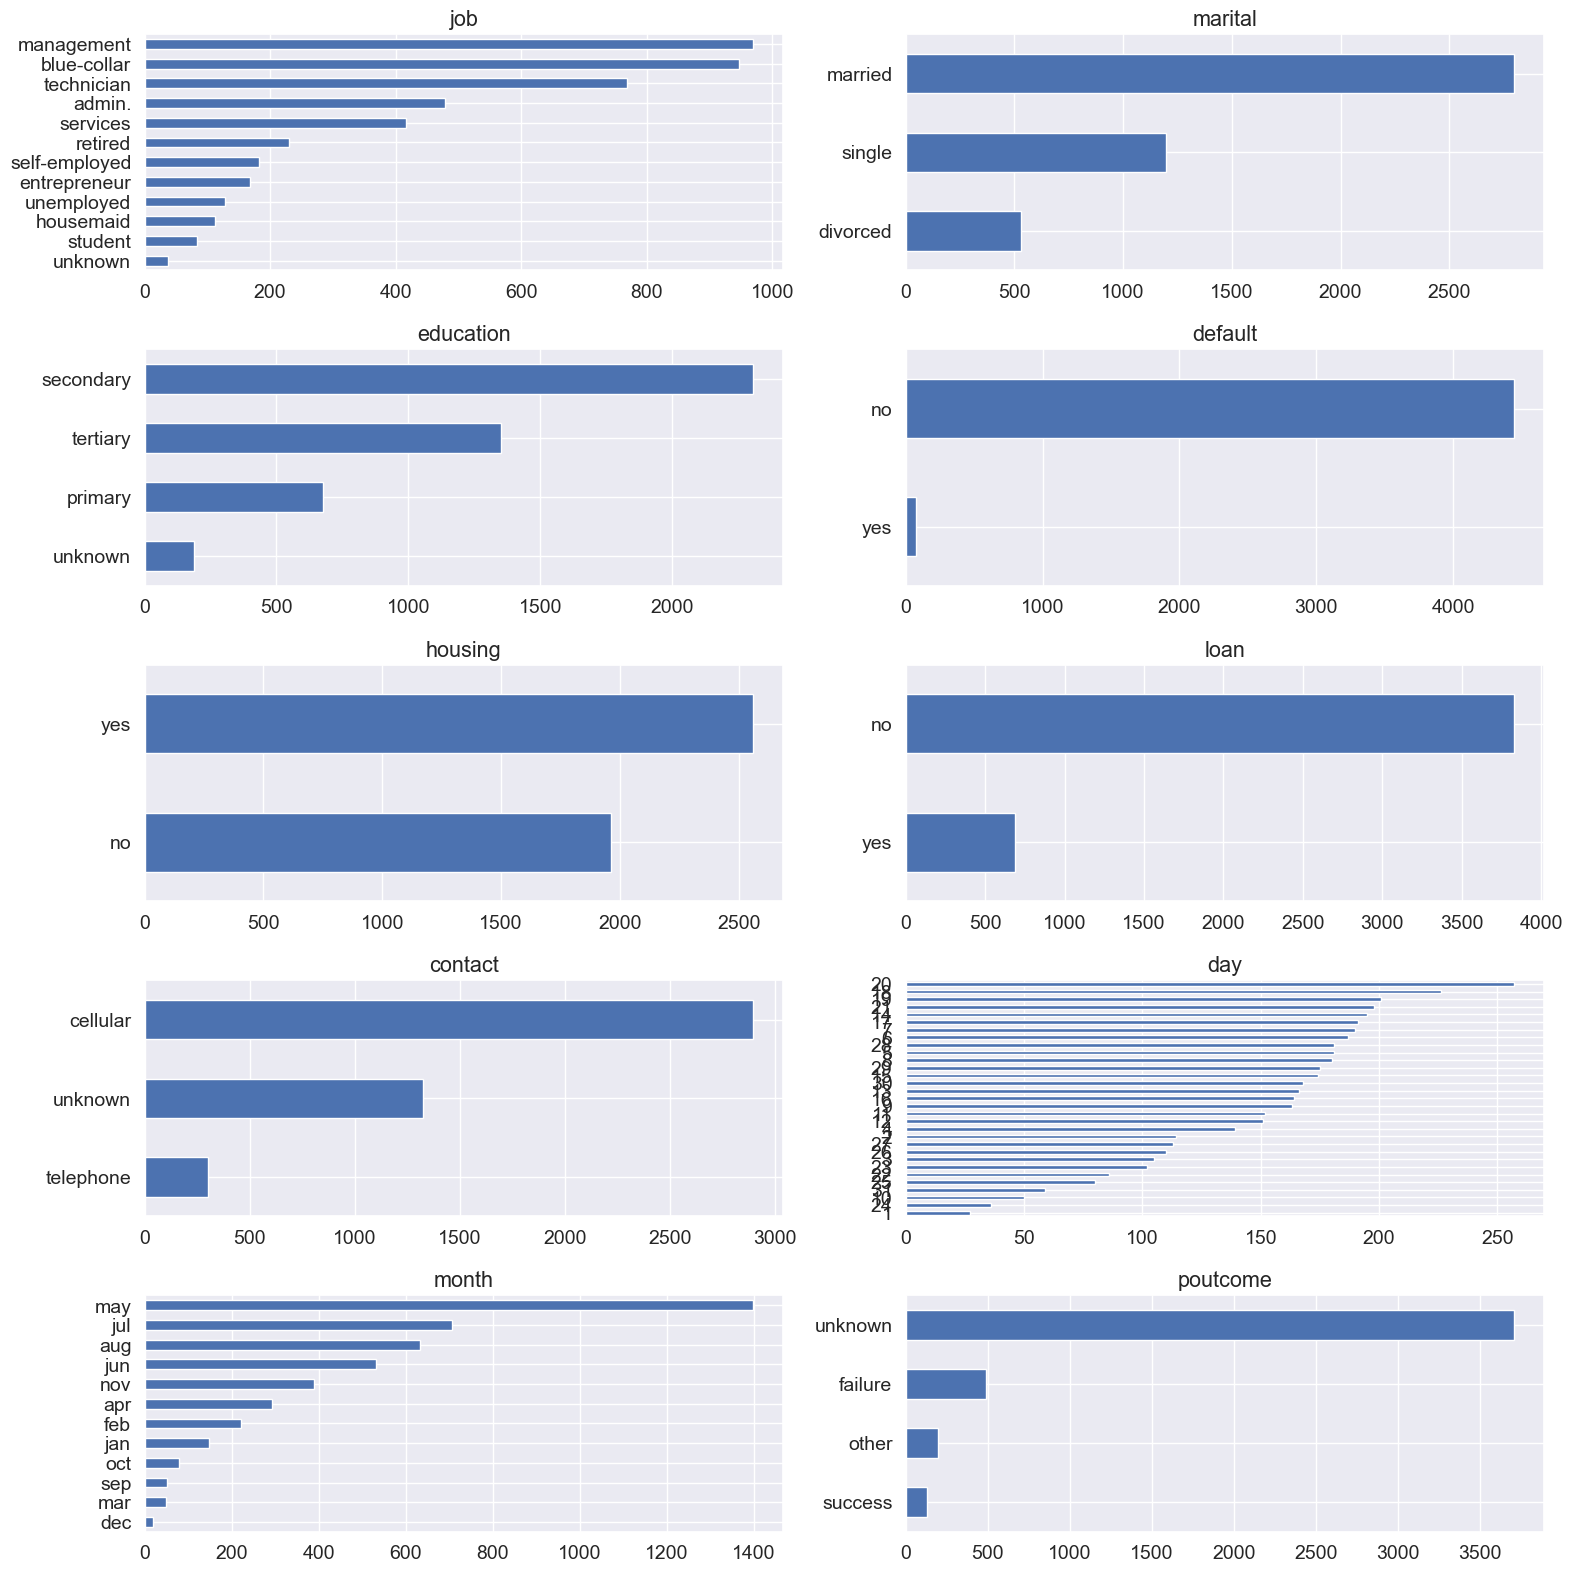

In [85]:
#Univariate Analysis of Categorical Features

#A way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable.

fig, axes = plt.subplots(5, 2, figsize=(16, 16)) #total 10 subplots that's why 5*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

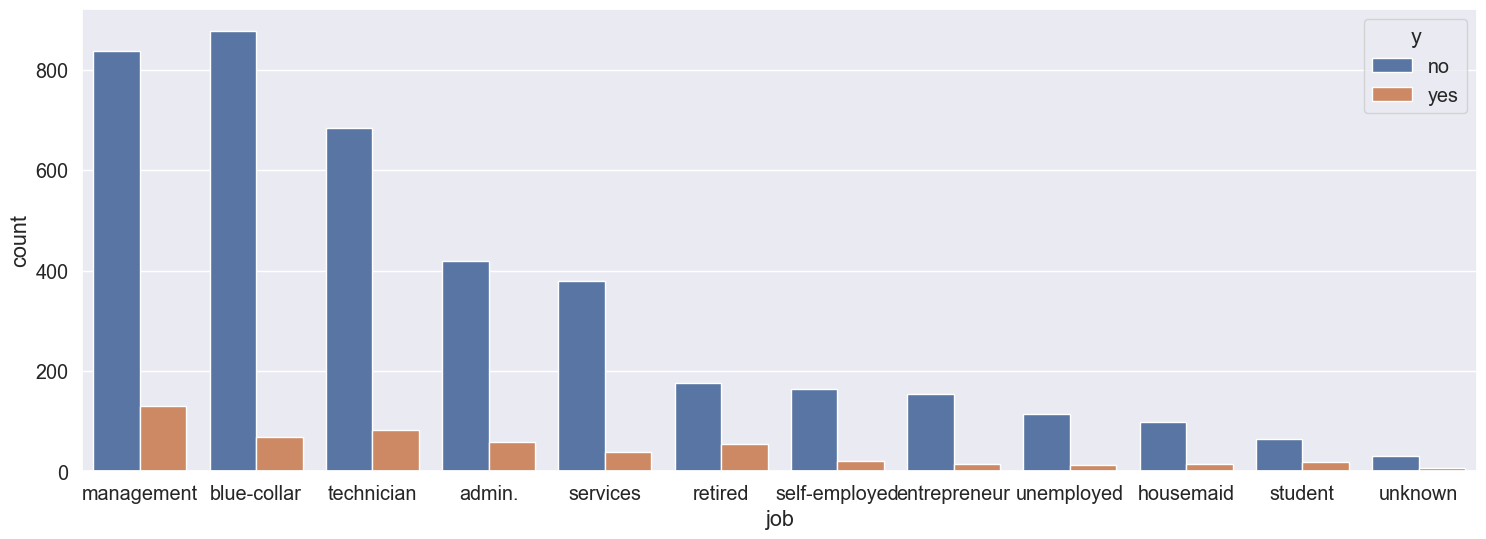

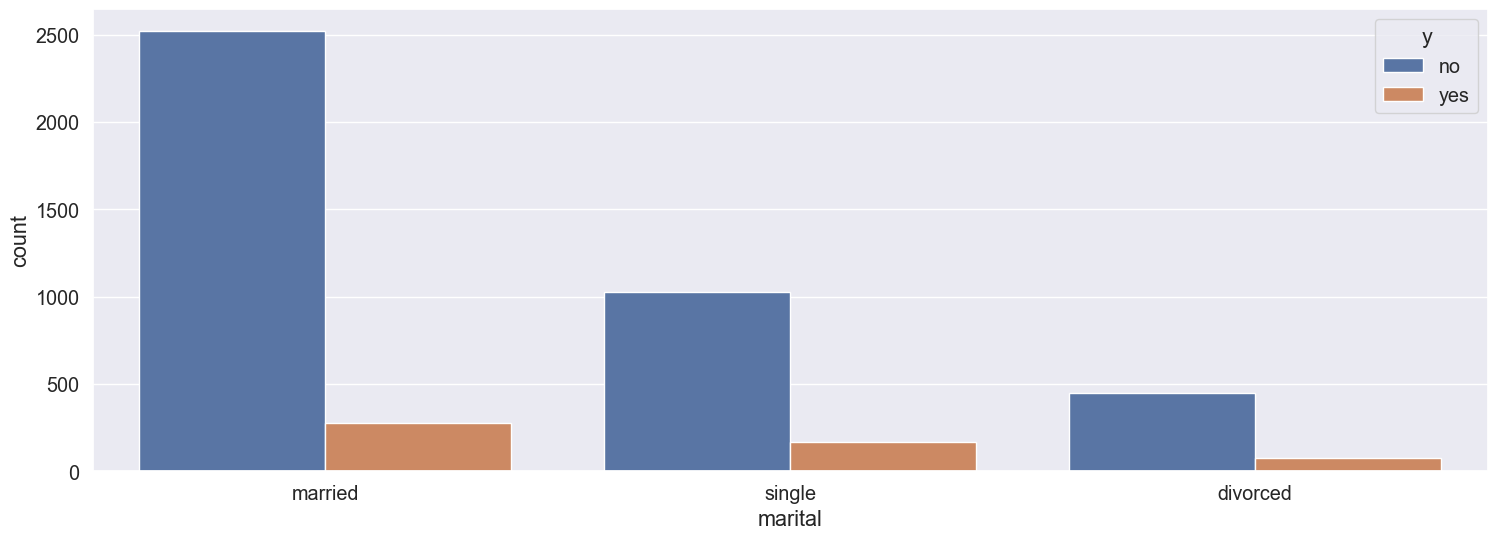

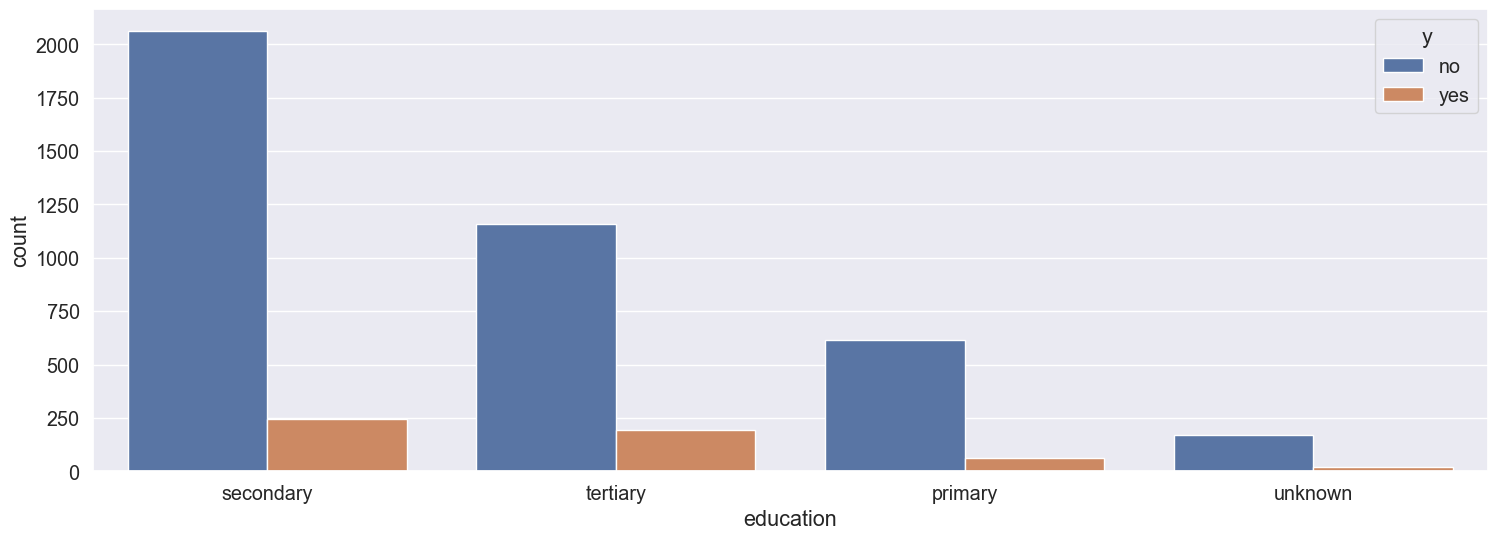

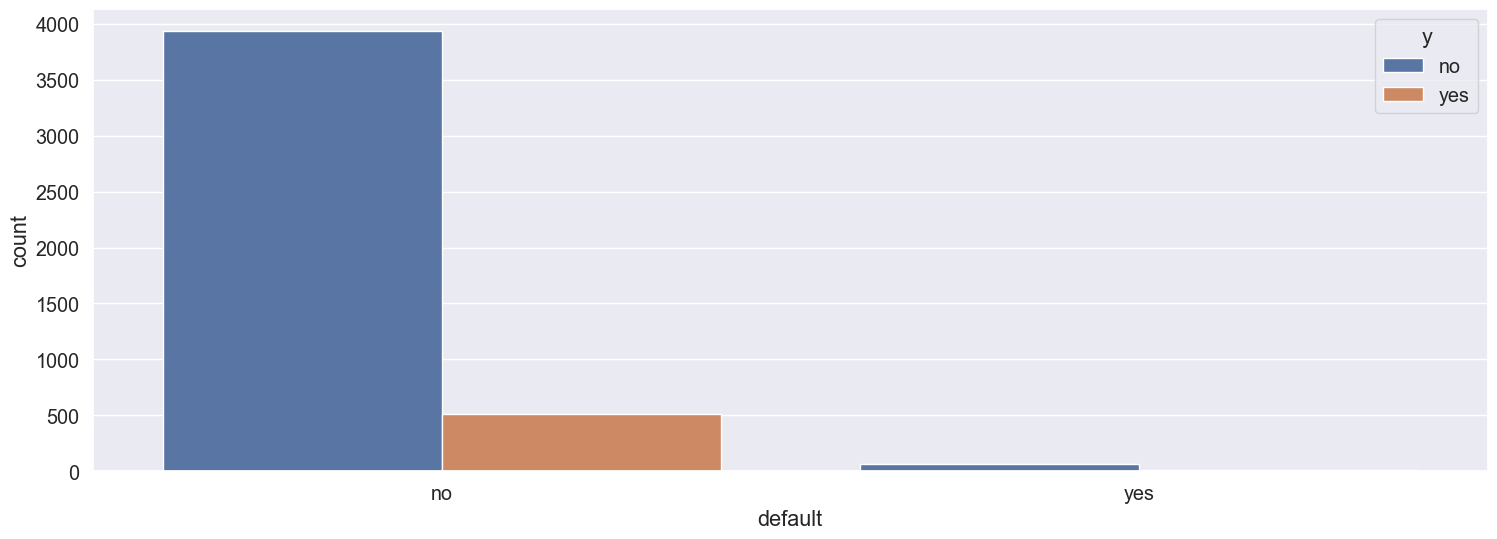

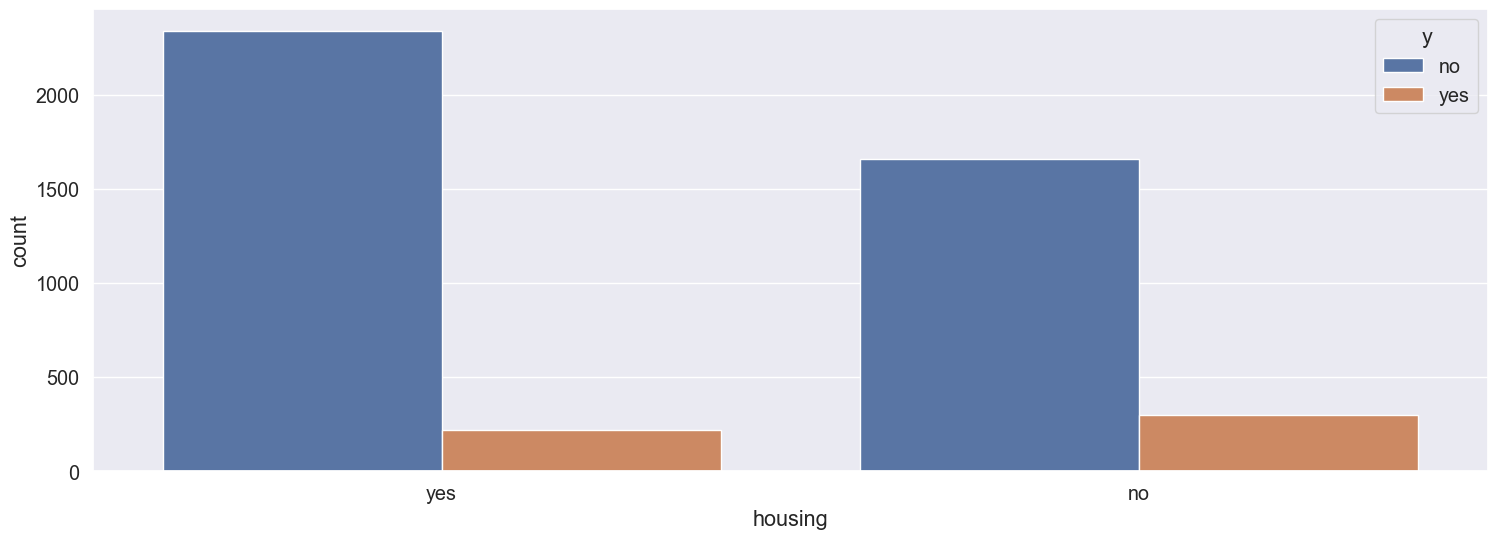

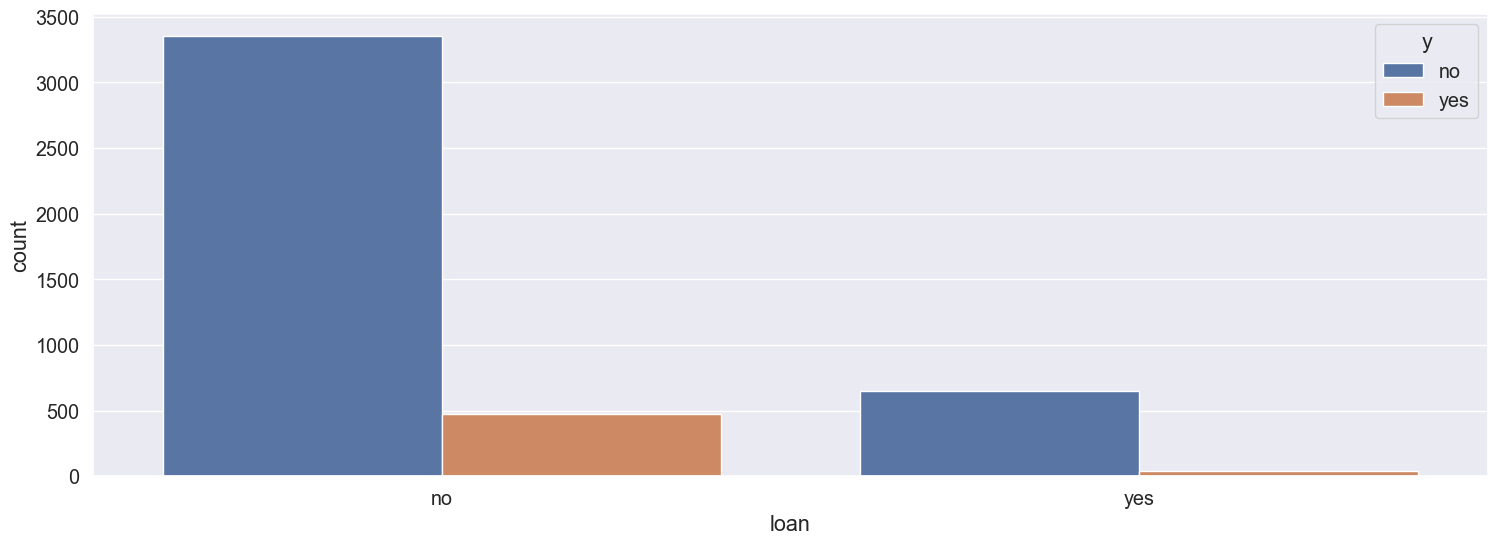

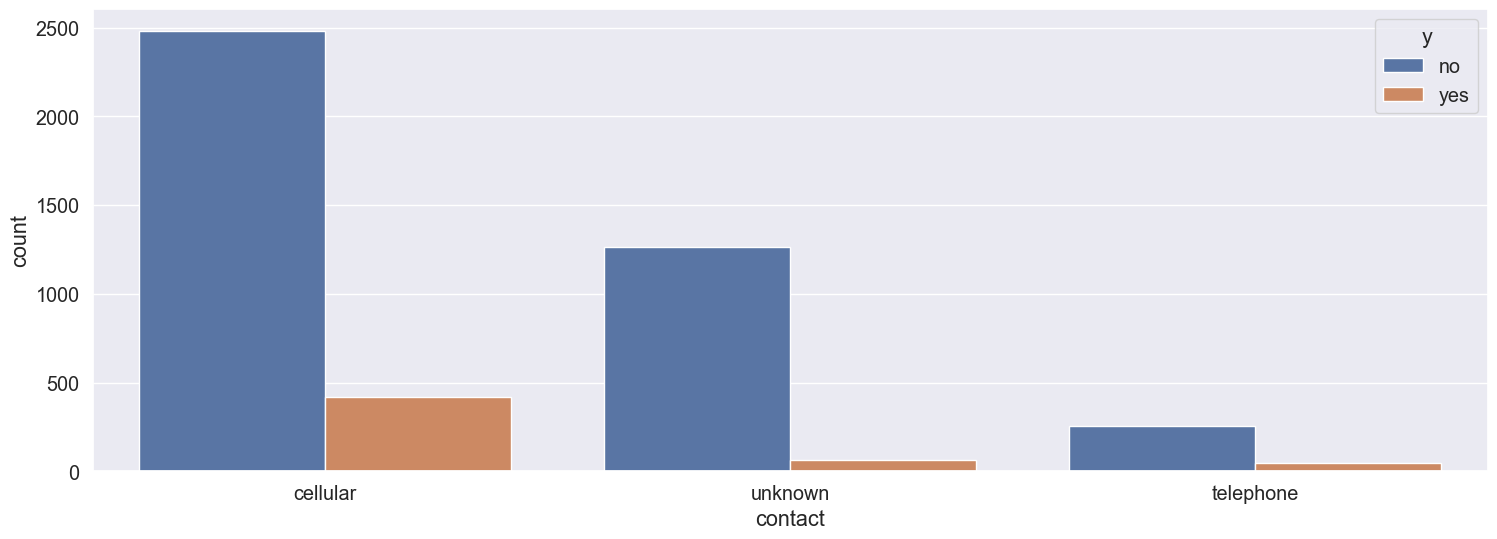

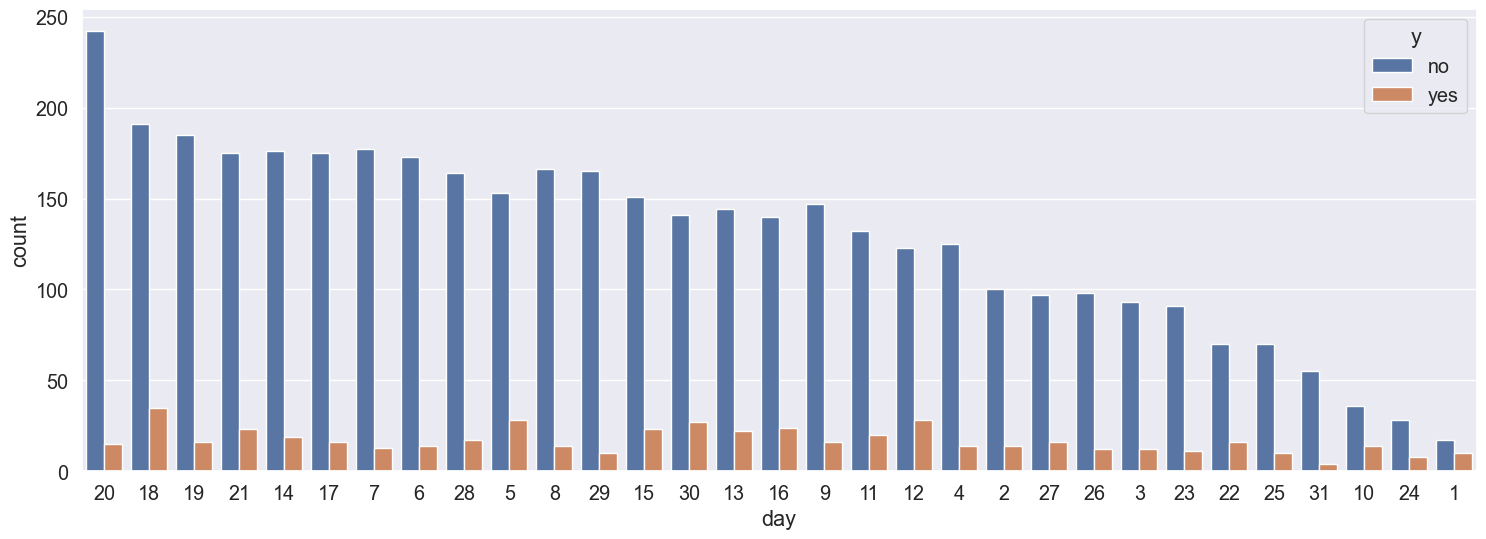

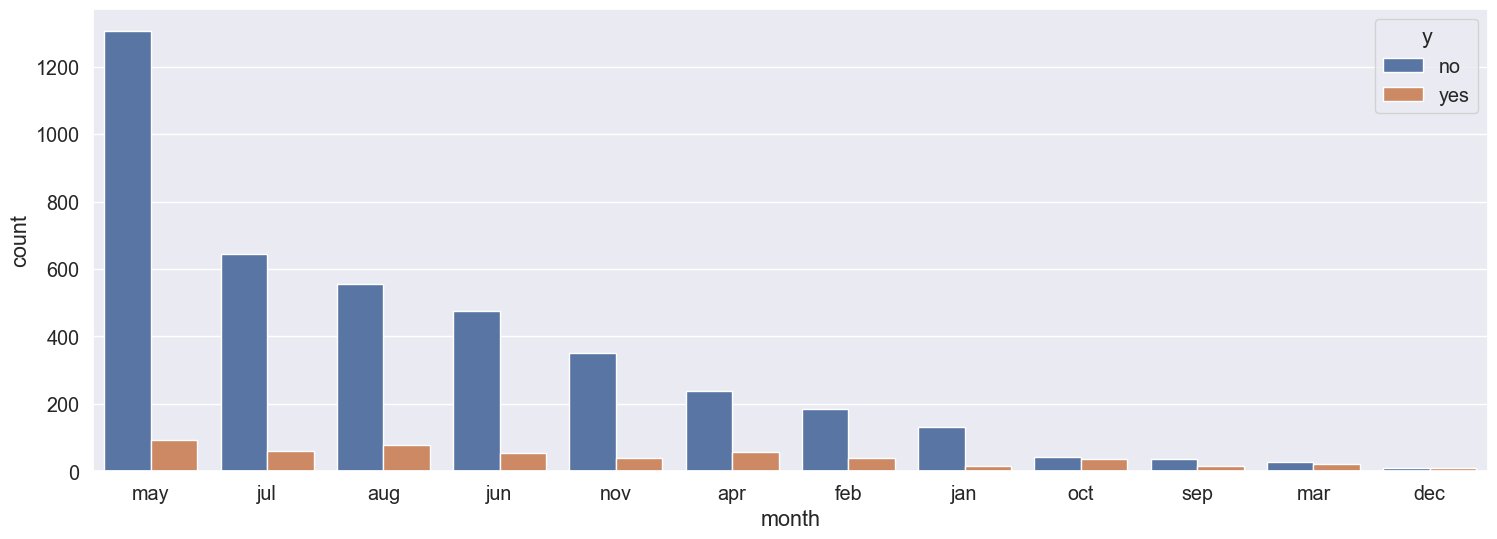

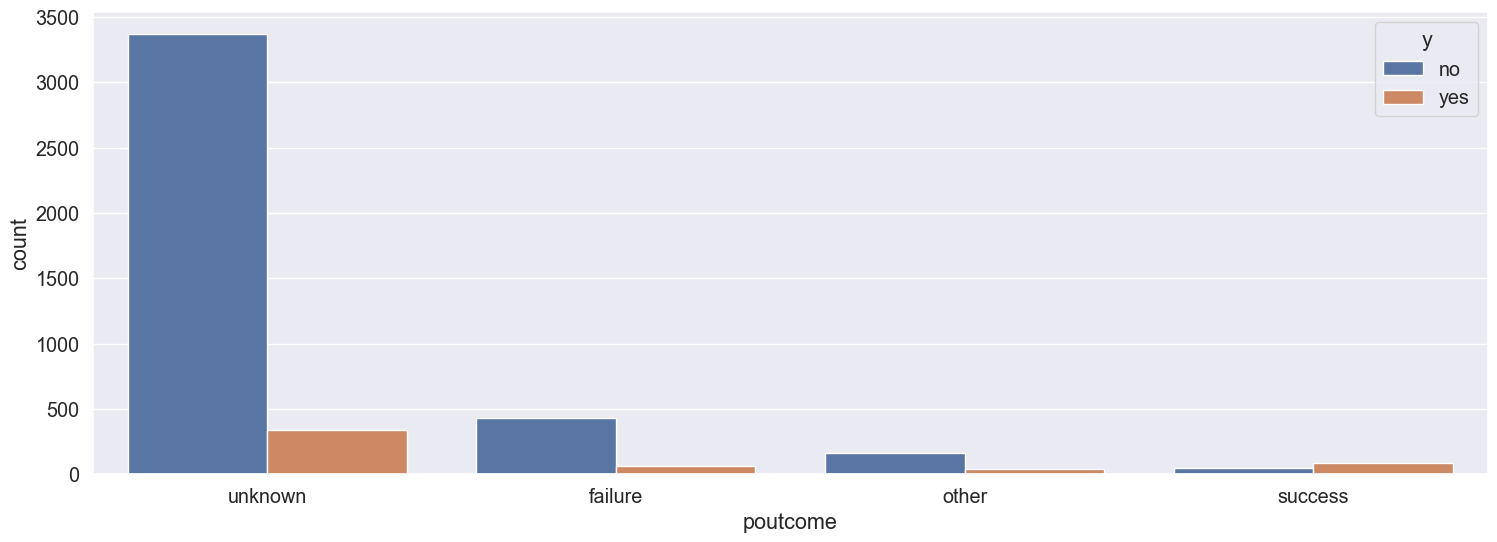

In [86]:
#Bivariate Analysis: Relationships of Categorical Features with Target


for c in cat_cols:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='y',data = data,order = data[c].value_counts().index) #individual bars sorted acc to frequency and then plotted


From the day_of_week plot, we can see that, all the days have the similar distribution for both the classes. Thus we won't be using it in predicting the target variable. We have dropped this feature before making our models below!

In [87]:
data1= data.copy()

data1['y'] = data1['y'].replace(['no','yes'],[0,1]) #needed to do below mathematical operations
data1.head()

#no of clients who subscribed to the term deposit grouped by occupation
total_subscribers = data1.groupby('job').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by occupation
proportion_subscribed = (round(data1.groupby('job').y.sum()/data1.groupby('job').y.count(),3)*100).values

# Total amount of clients per occupation
total_people = data1.groupby('job').y.count().values

#Form a dataframe and print
jobs = sorted(data1.job.unique()) #list of all jobs
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

,Job,Total Subscribers,Total People in Job,Proportion of Subscribers
5,retired,54,230,23.5
8,student,19,84,22.6
11,unknown,7,38,18.4
4,management,131,969,13.5
3,housemaid,14,112,12.5
0,admin.,58,478,12.1
6,self-employed,20,183,10.9
9,technician,83,768,10.8
10,unemployed,13,128,10.2
7,services,38,417,9.1


**Observations:**
Though the number of admin, blue collar, technician subscribers are more, we can also see that according to proportion, students and retired people are much more likely to subscribe to our term deposits!

In [88]:
married_subscribers = data1[(data1.marital=='married') ].y.sum()
single_subscribers = data1[(data1.marital=='single') | (data1.marital=='divorced')].y.sum() #single or divorced

married_subscribers_prop = married_subscribers/len(data1[data1.marital=='married'])
single_subscribers_prop = single_subscribers/len(data1[(data1.marital=='single') | (data1.marital=='divorced')])

print('No of Married clients who subscribe: {}'.format(married_subscribers))
print('No of Single (and divorced) clients who subscribe : {}'.format(single_subscribers))

print('Married clients campaign success rate: {0:.0f}%'.format(married_subscribers_prop*100))
print('Single clients campaign success rate: {0:.0f}%'.format(single_subscribers_prop*100))

No of Married clients who subscribe: 277
No of Single (and divorced) clients who subscribe : 244
Married clients campaign success rate: 10%
Single clients campaign success rate: 14%


**Observations:** Even though we have more clients who are married subscribers, If we look according to proportions, we see that single clients responded to the campaign better.

**Answering Hypothesis Questions:**



**1.Are senior (retired) people more likely to subscribe for term deposits? (they may prefer safe investments)**

**Observation**: No. The number of subscriptions by retired people are less. But We can see a positive result of the marketing campaign on senior people i.e 
the proprtion of yes/no is more for retired folks. [See table below]

Similarly, it is also interesting to see a very positive effect of the marketing campaign on students.


**2.Do salaried people prefer it more than business owners who would invest money into their business rather than putting in bank?**

**Observation**: Yes. Salaried People (management,admin, service, technician, blue collar jobs etc. ) are much more interested than entrepreneurs and self employed people.


**3.Are married people more likely to subscibe for term deposits? (They may prefer having savings for their children?)**

**Observation**: No, Proportion of single subscribers is more by 4%.


**4.If you already have loans, would you be less likely to subscibe to term deposits?**

**Observation:** People having personal loans subscribe less to the term deposits. The same is not true for people with home loans.



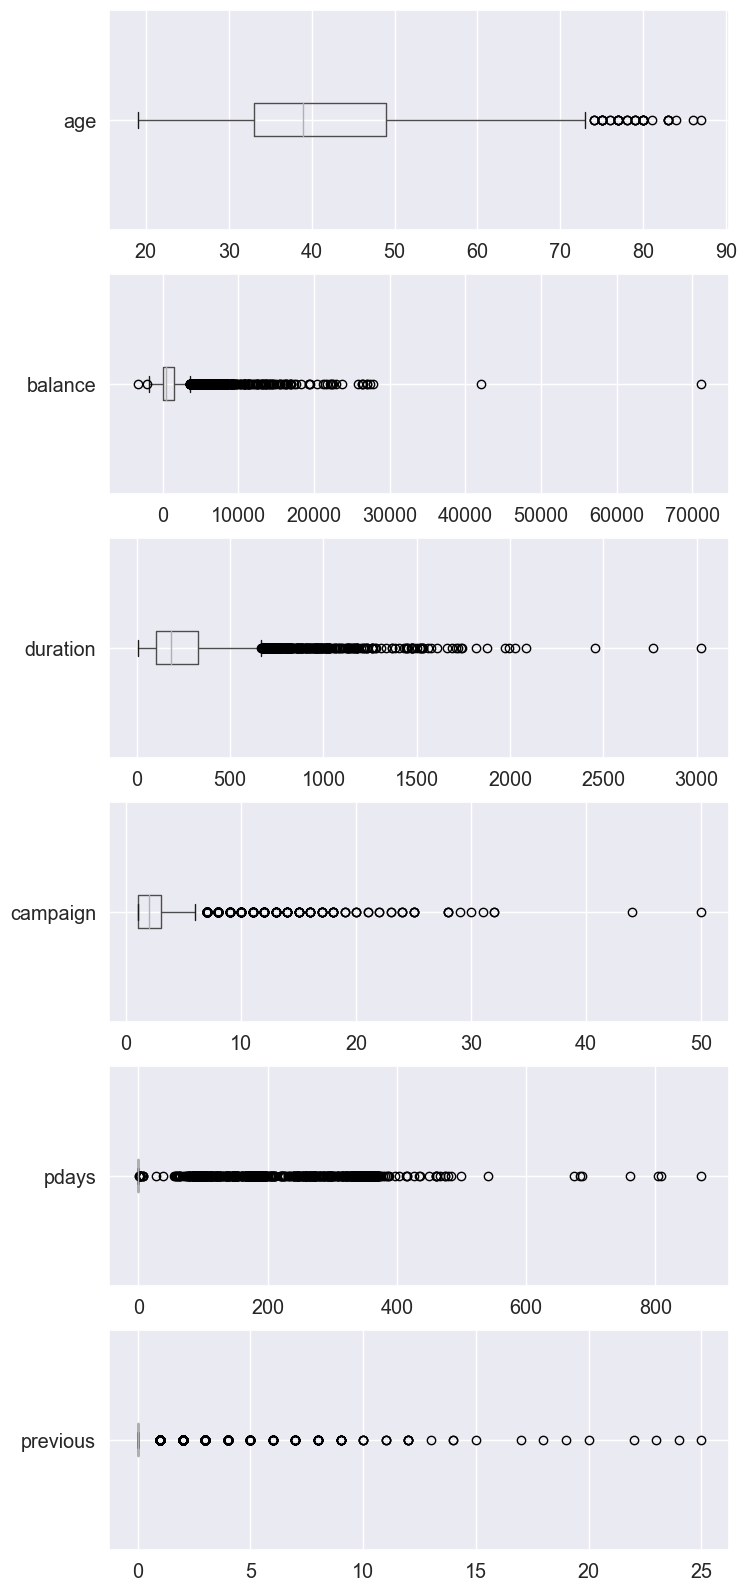

In [89]:
#Numerical Features


#Univariate Analysis using Boxplots
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
    _ = data[[c]].boxplot(ax=axes[i], vert=False)

We can see some features are skewed and not normally distributed. The never contacted before respondents skew the variables “campaign” and “previous” towards zero. But it is not compulsary to make the features normally distributed, so we won't do that right now.

The boxplot of pdays looks so strange because most records have pdays as 999. The distribution of the number of days since the previous campaign (“pdays”) is skewed towards 1,000 because, for the respondents who were never contacted, the value is 999. The other values of pdays are very small comaparitively.

We have handled this feature in code below before building our models.

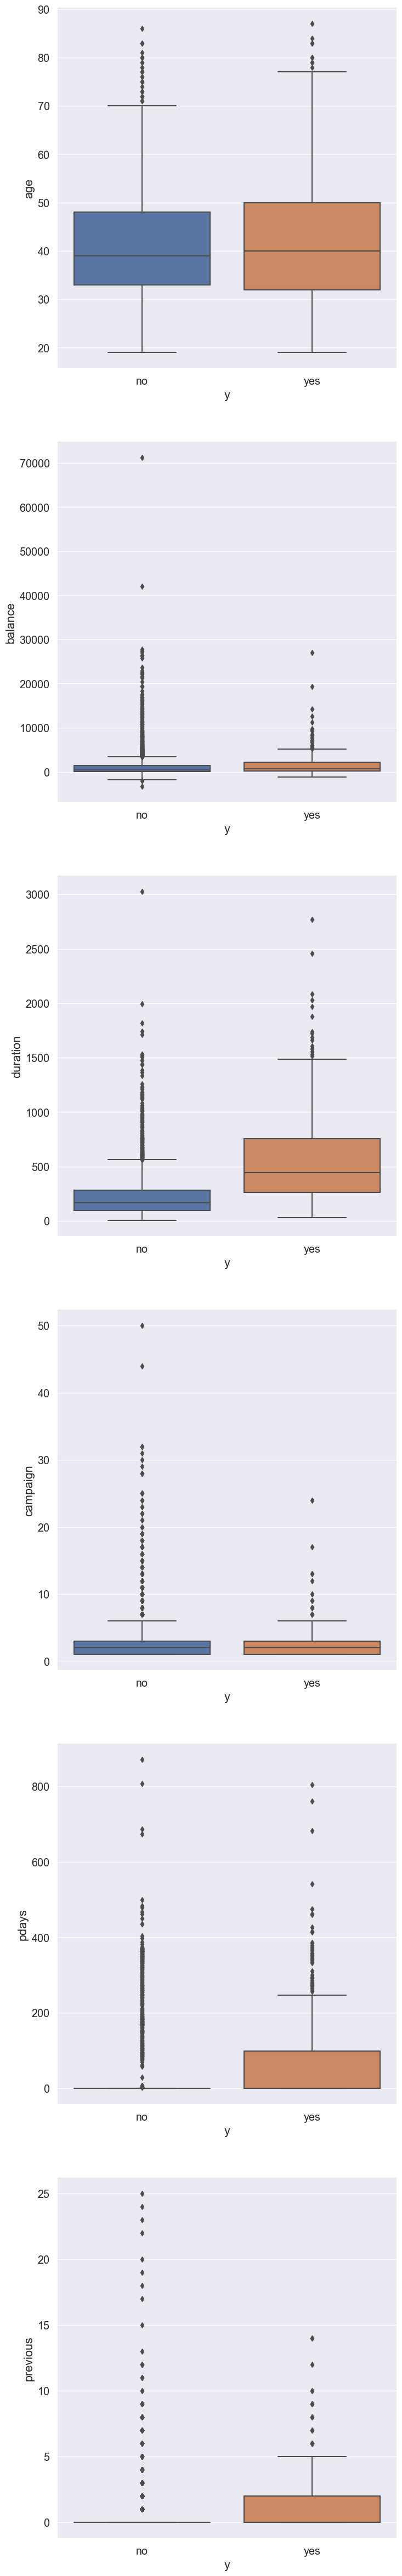

In [90]:
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 60))
for i, c in enumerate(num_cols):
    sns.boxplot(data=data,x='y',y=c,ax=axes[i])  

Observations: The boxplots for both the classes overlap quite a lot, which means that those particular features aren't necessarily a good indicator for which customer will subscribe and which customer will not.

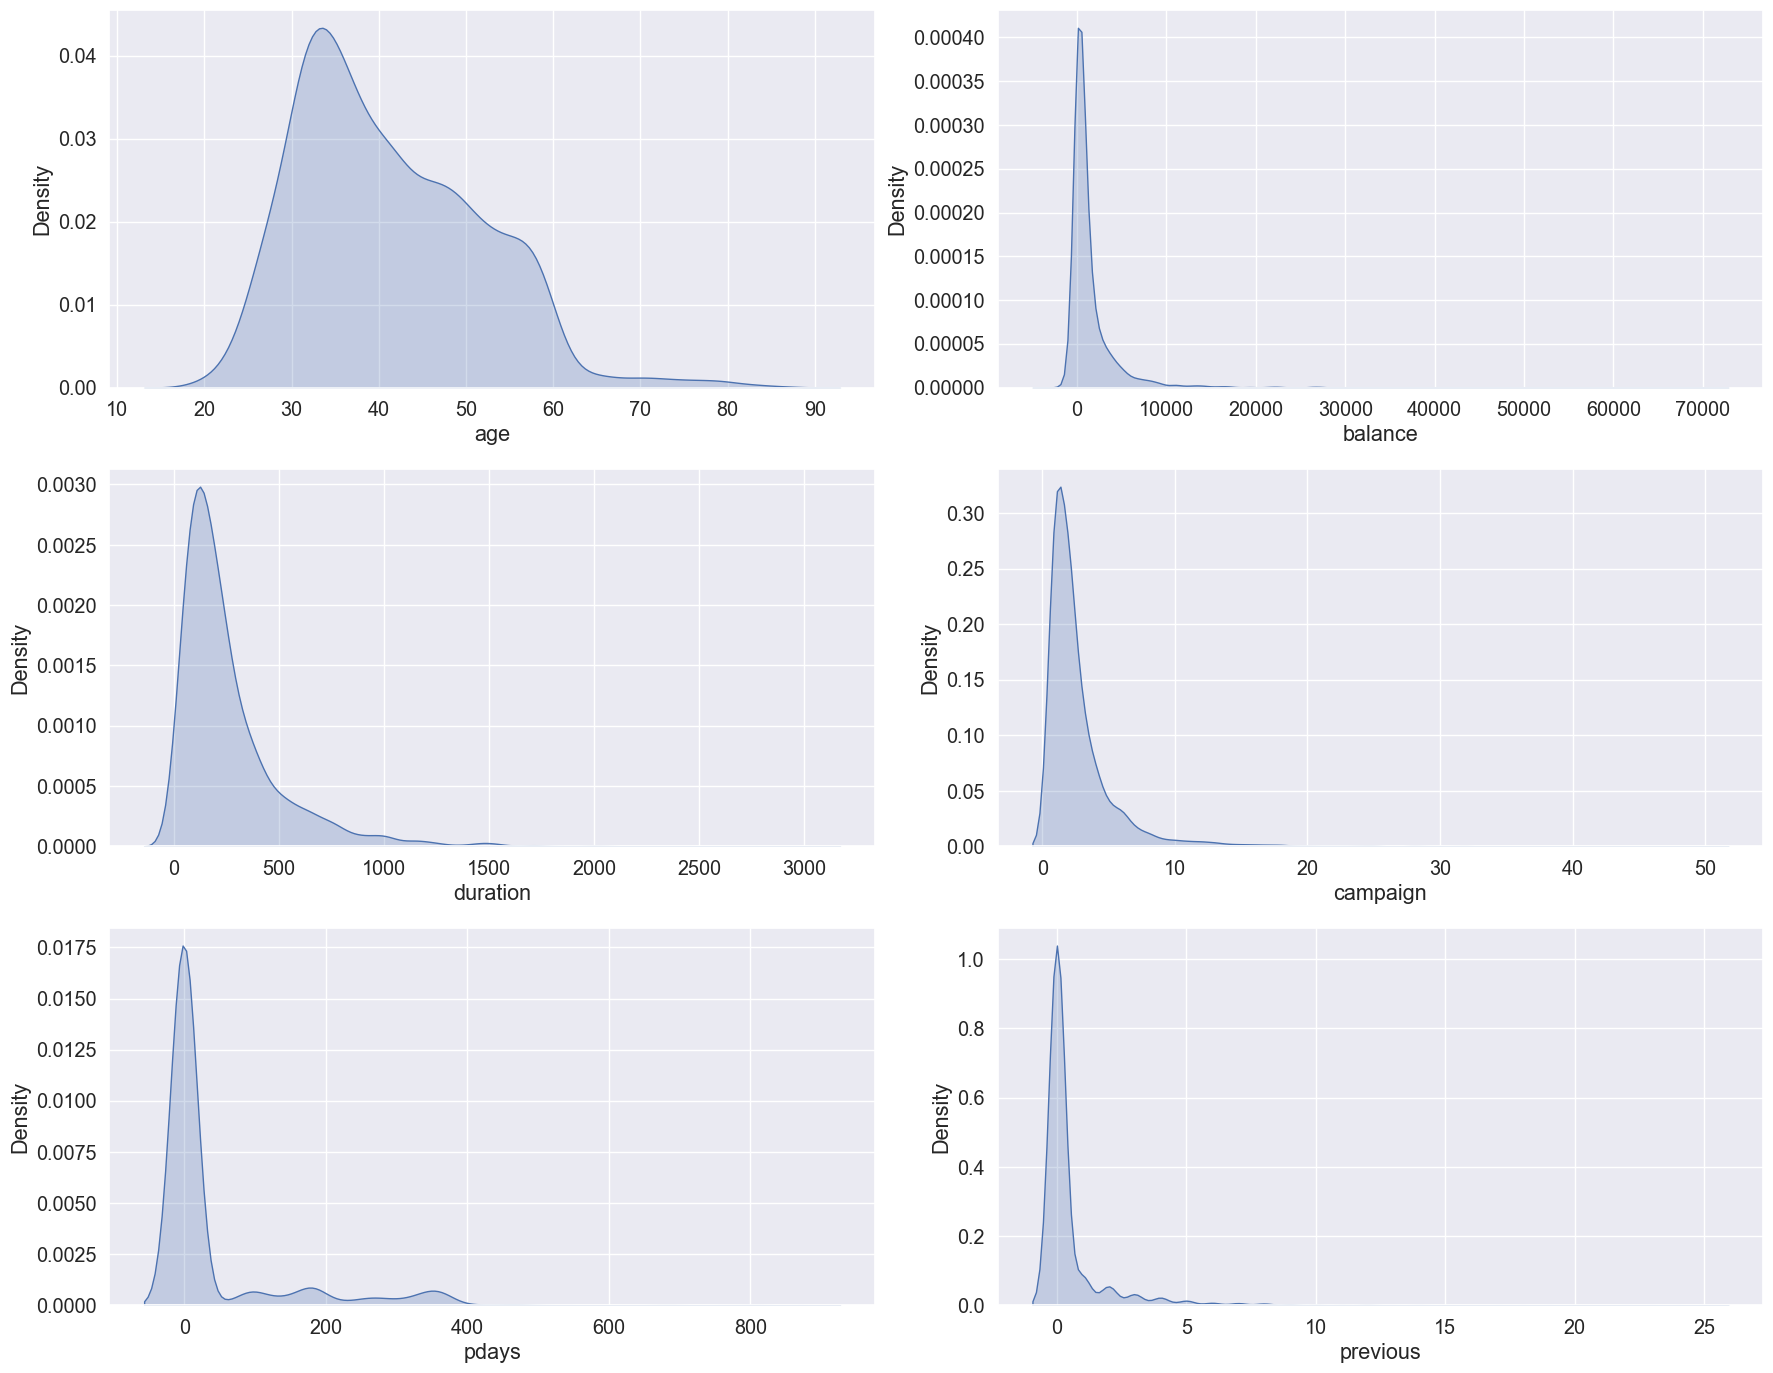

In [91]:
#Univariate Analysis using Density Plots

#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

We could confirm our observation about 'pdays' feature from its kde plot as well! 

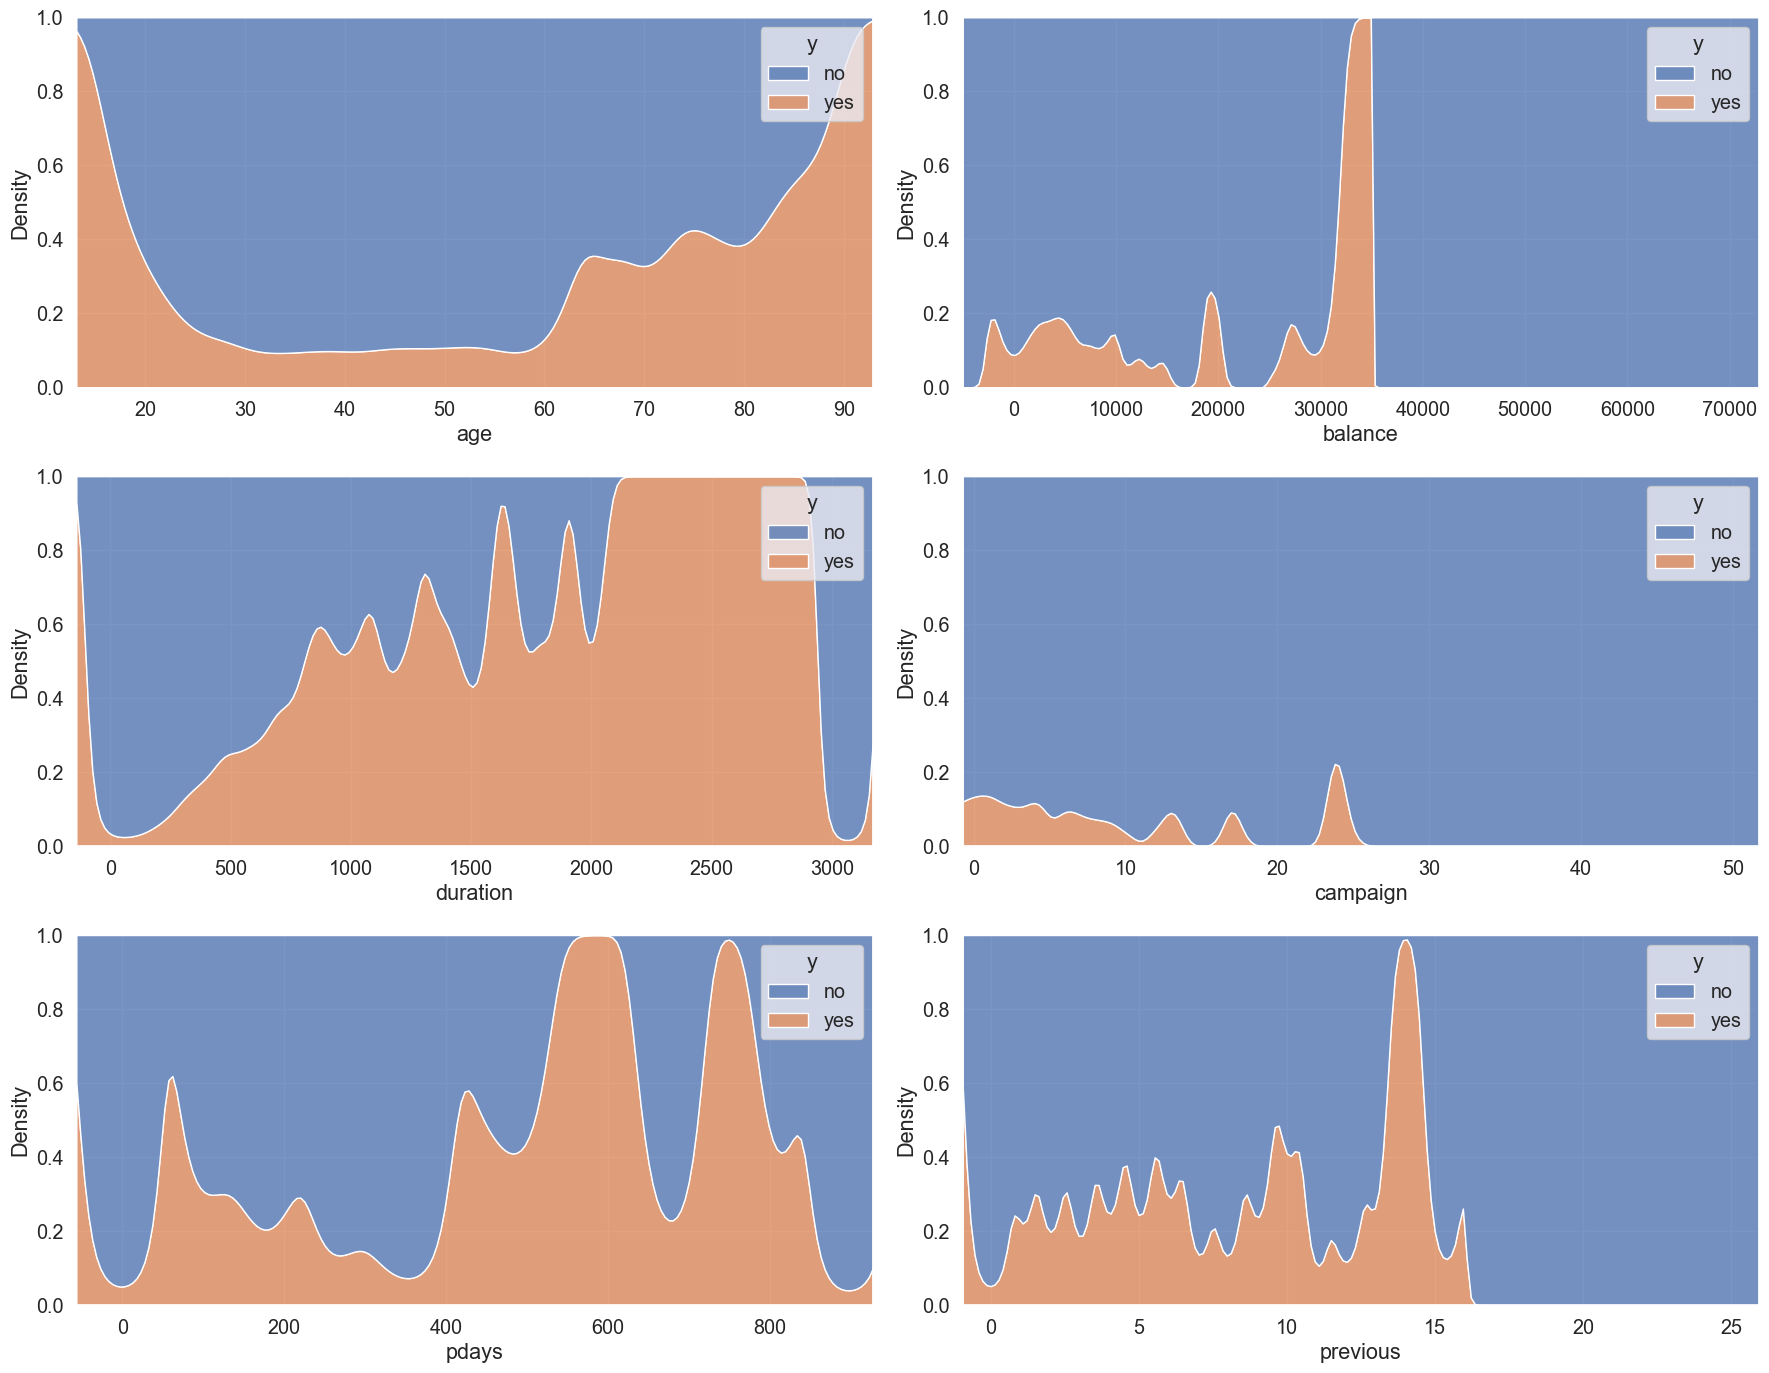

In [92]:
# Bivariate Analysis KDE plots - Relationships with Target Variable

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

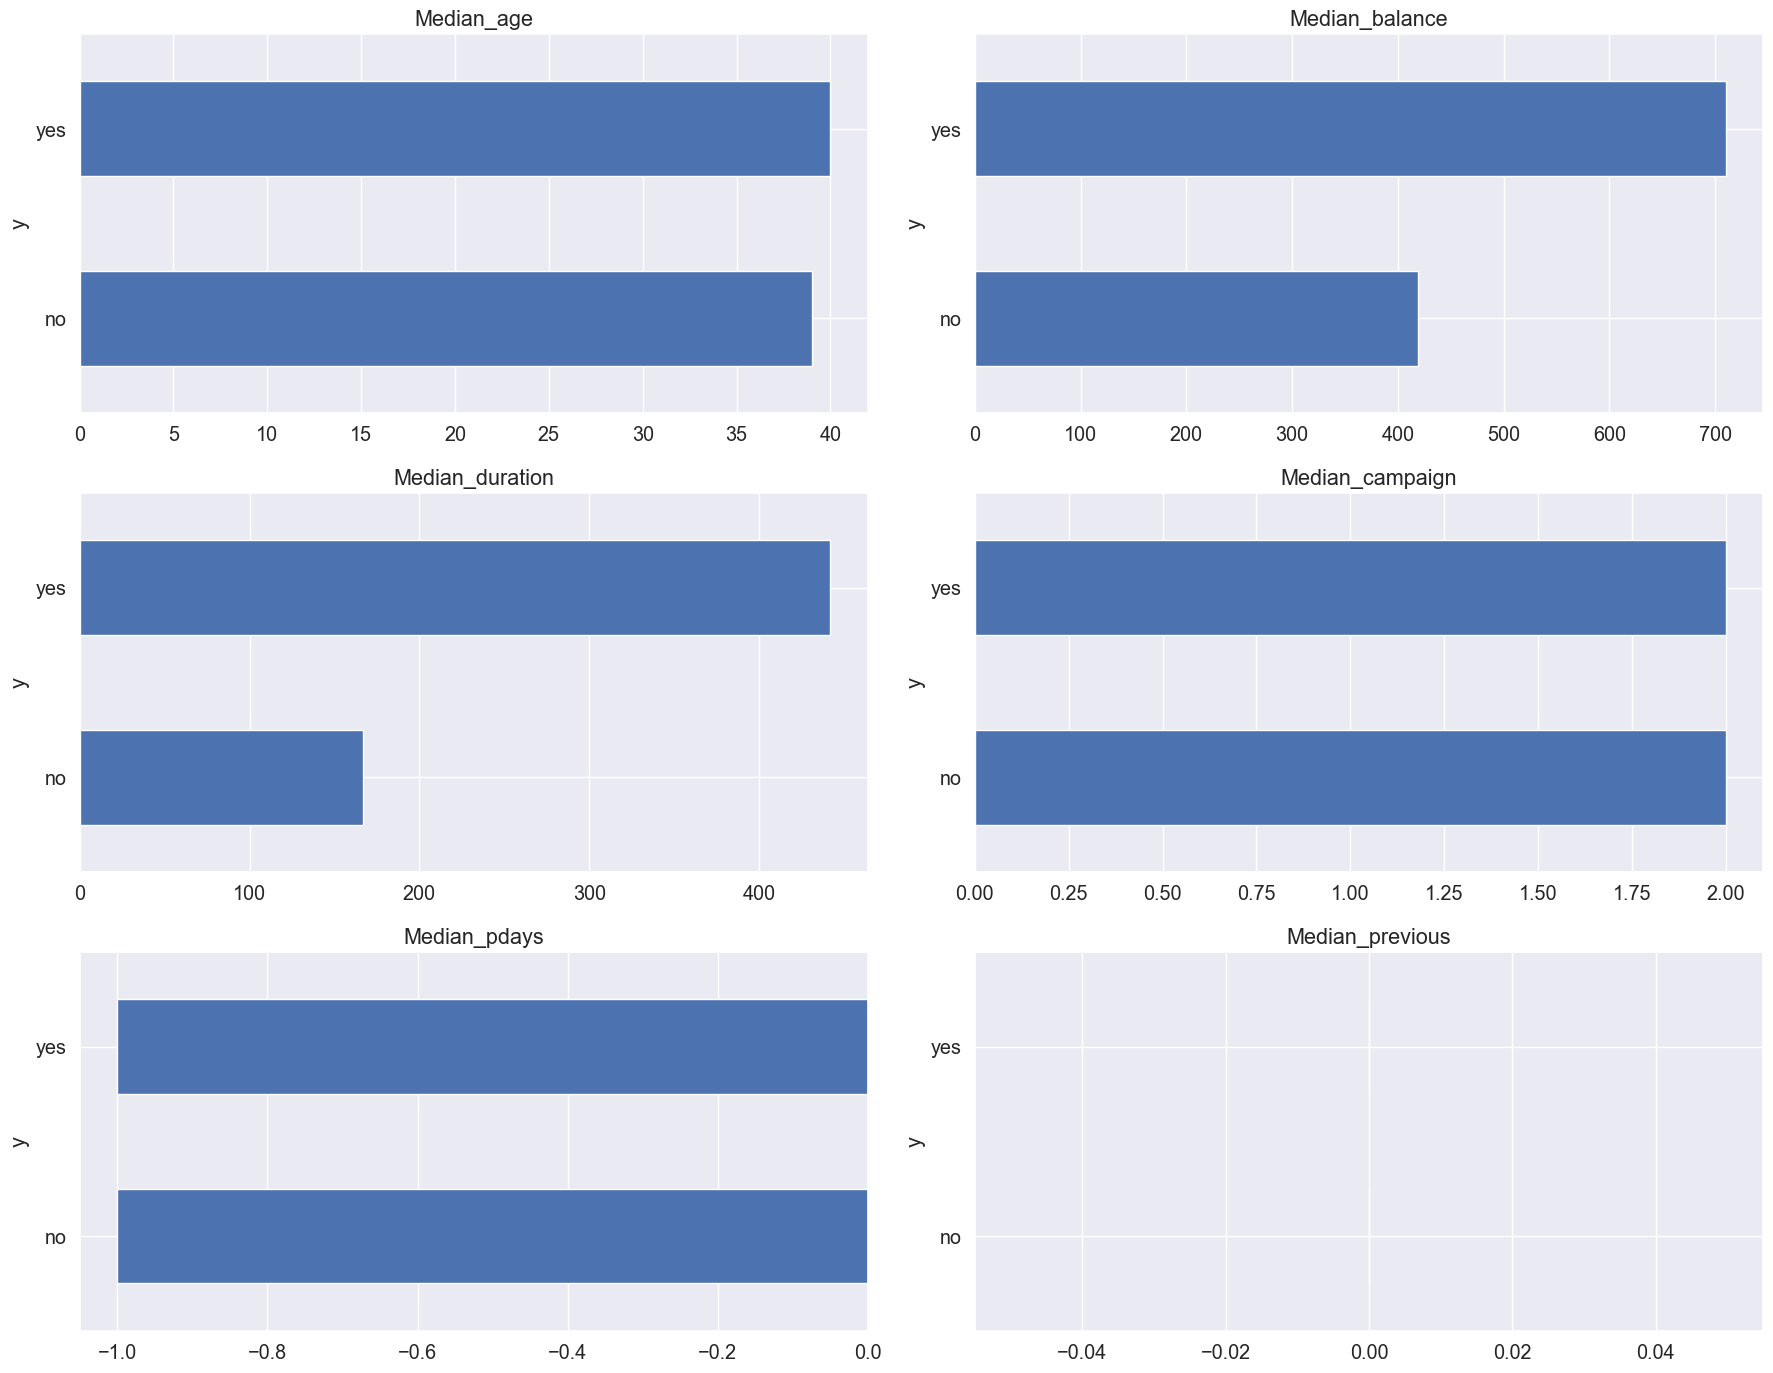

In [93]:
#For each numerical Variable. We will plot the median of the numerical variable for:
#1. When target col == 'no'
#2. when target col == 'yes'

#We are choosing median since median is not affected by outliers, and our data has outliers

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = data.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()


5.Are younger customers more likely to subscribe to a term deposit compared to old customers ?

**Observation:** It's not very clear from our above plot since we have median age of around 37 for both cases.


In [94]:
n1=len(data[(data['age'] > 60) & (data['y'] == 'yes')]) #number of old subscribers
n2=len(data[(data['age'] > 60) & (data['y'] == 'no')]) #number of old non-subscribers
n3=len(data[(data['age'] <= 60) & (data['y'] == 'yes')]) #number of young subscribers
n4=len(data[(data['age'] <= 60) & (data['y'] == 'no')]) #number of young non-subscribers

print(f'Proportion of young subscribers is: {n3/(n3+n4)} and the proportion of old subscribers is {n1/(n1+n2)}')

Proportion of young subscribers is: 0.10764679107874374 and the proportion of old subscribers is 0.3779527559055118


It looks like effect of marketing on old people is much more positive than corresponding effect on young people! So old people can be a major group we would like to target!

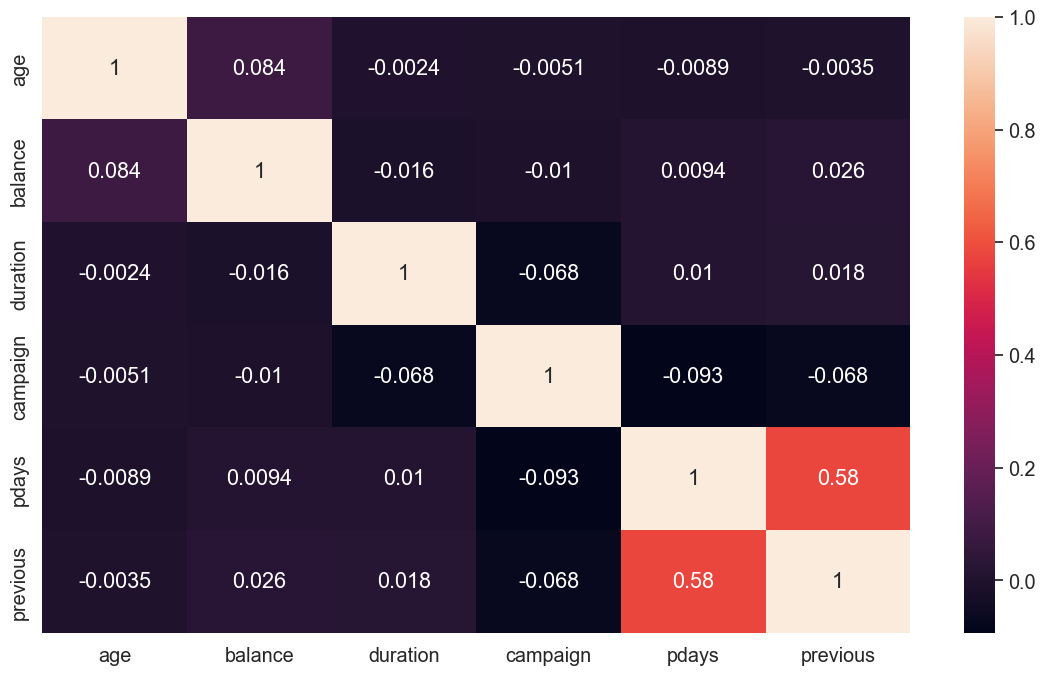

In [95]:
#Bivariate Analysis - Correlation Heatmaps

plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[num_cols].corr(), annot=True)

# Feature Engineering and Modelling

Baseline Models:

Model 1. (Predicting all instances as majority)

In [96]:
#As given in dataset description, we won't use 'duration' column. 
#Reason: We should note here the column “duration” has an interesting relationship with the target variable. If there were no phone calls (i.e. duration =0) then our target, y, has to be no. This will cause some unbalancing in the model and would inhibit the predictive power. In order to have a more realistic prediction, we will drop this column from our dataframe.

#We can't predict how long we gonna talk to the client (duration) and how many calls would require to get the answer about deposit (campaign), so let's drop these! 

data= data.drop(['duration','campaign'],axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,-1,0,unknown,no


In [97]:
#replacing no and yes by 0 and 1 respectively as our target values!
data['y'] = data['y'].replace(['no','yes'],[0,1])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,-1,0,unknown,0


In [98]:
feat = [c for c in data.columns if c not in [TARGET_COL]]
len(feat)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.33)
print(train.shape)
print(test.shape)


(3029, 15)
(1492, 15)


In [99]:
#Input to our model will be the features
train_X, test_X = train[feat], test[feat]

#Output of our model will be the TARGET_COL
train_y, test_y = train[TARGET_COL], test[TARGET_COL]


In [100]:
#As we saw before too, 0 ('no') is the majority class. Lets begin by predicting everything as 0 ('no').
preds_test = np.zeros(len(test_X))

#accuracy,f1 on test data 
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(test_y, preds_test)
f1 = f1_score(test_y, preds_test)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')


Accuracy score is: 0.886058981233244
F1 score is: 0.0


In [101]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[1322    0]
 [ 170    0]]


In [102]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.5


We have to improve this F1-score and AUC Score by creating more intelligent models.

Model 2. (Random Predictions with equal probability)

In [103]:
#Since we are dealing with randomness, its important to set a seed, so we get same randomness everytime.
np.random.seed(2)

preds_test = np.random.choice([0, 1], size=len(test_y))

f1_score(test_y, preds_test)

0.1756311745334797

Still not an excellent score. We'll improve it as we build more models.

In [104]:
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[661 661]
 [ 90  80]]


In [105]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.4852941176470589


3.More Intelligent Classification Models

In [106]:
train.shape, test.shape

((3029, 15), (1492, 15))

In [107]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
192,30,management,single,tertiary,no,1372,no,no,cellular,20,nov,-1,0,unknown,0
2818,57,entrepreneur,divorced,secondary,yes,25,yes,no,cellular,11,may,370,4,other,0
3764,31,unemployed,married,secondary,no,24,yes,no,cellular,19,nov,-1,0,unknown,0
1944,48,blue-collar,married,secondary,no,333,yes,no,cellular,14,may,-1,0,unknown,0
3155,55,technician,single,tertiary,no,-703,yes,no,cellular,8,may,-1,0,unknown,0


In [108]:
#Concatenate/Join the train and test Datasets. All kinds of processing must be performed on both train and test datasets together.
df = pd.concat([train, test], axis=0).reset_index(drop = True) #reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.
df.shape

(4521, 15)

In [109]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
0,30,management,single,tertiary,no,1372,no,no,cellular,20,nov,-1,0,unknown,0
1,57,entrepreneur,divorced,secondary,yes,25,yes,no,cellular,11,may,370,4,other,0
2,31,unemployed,married,secondary,no,24,yes,no,cellular,19,nov,-1,0,unknown,0
3,48,blue-collar,married,secondary,no,333,yes,no,cellular,14,may,-1,0,unknown,0
4,55,technician,single,tertiary,no,-703,yes,no,cellular,8,may,-1,0,unknown,0


In [110]:
#let's remove these two categorical features which we think won't be useful in building our ML models
df.drop(['day','month'],axis=1,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,pdays,previous,poutcome,y
0,30,management,single,tertiary,no,1372,no,no,cellular,-1,0,unknown,0
1,57,entrepreneur,divorced,secondary,yes,25,yes,no,cellular,370,4,other,0
2,31,unemployed,married,secondary,no,24,yes,no,cellular,-1,0,unknown,0
3,48,blue-collar,married,secondary,no,333,yes,no,cellular,-1,0,unknown,0
4,55,technician,single,tertiary,no,-703,yes,no,cellular,-1,0,unknown,0


Converting all Categorical Variables to numbers.

In [111]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
    print(df[c].value_counts())

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
no     4445
yes      76
Name: default, dtype: int64
yes    2559
no     1962
Name: housing, dtype: int64
no     3830
yes     691
Name: loan, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


In [112]:
df.shape

(4521, 13)

In [113]:
#dropping rows with 'unknown' values for any categorical column.

index_names= df[(df.job == 'unknown') | (df.marital == 'unknown') | (df.education == 'unknown') | (df.default == 'unknown') | (df.housing == 'unknown') | (df.loan == 'unknown')].index
#print(index_names)
  
# drop these given row 
# indexes from dataFrame 
df.drop(index_names, inplace = True) 
df.shape

(4311, 13)

In [114]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
    print(df[c].value_counts())

management       942
blue-collar      905
technician       746
admin.           461
services         404
retired          216
self-employed    179
entrepreneur     157
unemployed       126
housemaid        107
student           68
Name: job, dtype: int64
married     2664
single      1144
divorced     503
Name: marital, dtype: int64
secondary    2298
tertiary     1342
primary       671
Name: education, dtype: int64
no     4238
yes      73
Name: default, dtype: int64
yes    2475
no     1836
Name: housing, dtype: int64
no     3628
yes     683
Name: loan, dtype: int64
cellular     2784
unknown      1247
telephone     280
Name: contact, dtype: int64
unknown    3536
failure     470
other       188
success     117
Name: poutcome, dtype: int64


Since number of categories for each column is low, we can use ONE HOT ENCODING.

In [115]:
df= pd.get_dummies(df,columns=new_cat_cols)
df.head()

,age,balance,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1372,-1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,57,25,370,4,0,0,0,1,0,0,...,1,1,0,1,0,0,0,1,0,0
2,31,24,-1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
3,48,333,-1,0,0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4,55,-703,-1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [116]:
df['pdays'].value_counts()

-1      3536
 182      23
 183      19
 91       11
 363      11
        ... 
 61        1
 208       1
 135       1
 28        1
 144       1
Name: pdays, Length: 285, dtype: int64

As we can see most records have pdays as 999. This means most records indicate the particular person was not contacted before. Let's convert this pdays column into a binary categorical column with 2 values: 0: pdays is 999 i.e person was not contacted and 1: pdays!=999 i.e person was contacted before.

In [117]:
#Syntax:
#df[new_column]=np.where(condition, value if condition is true, value if condition is false)

df['has_contacted'] = np.where(df['pdays']!= 999, True, False)

df.drop(['pdays'],axis=1,inplace=True)

df.head()

,age,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted
0,30,1372,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,True
1,57,25,4,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,True
2,31,24,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,True
3,48,333,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,True
4,55,-703,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,True


In [118]:
df= pd.get_dummies(df,columns=['has_contacted'])
df.head()

,age,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted_True
0,30,1372,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
1,57,25,4,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
2,31,24,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
3,48,333,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
4,55,-703,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1


In [119]:
features = [c for c in df.columns if c not in [TARGET_COL]]
len(features)

34

**Split the combined dataset after preprocessing into train and test sets.**

We will use 80-20 split with 80% of the rows belonging to training data. 

Stratified Sampling is necessary, since the dataset is highly imbalanced. **Stratified sampling ensures that the minority class is distributed proportionally among the two classes.**

In [120]:
trn, test = train_test_split(df, test_size=0.2, random_state = 1, stratify = df[TARGET_COL]) #stratified sampling
trn.shape, test.shape

((3448, 35), (863, 35))

In [121]:
trn.head()

,age,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,has_contacted_True
3204,59,5314,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
975,58,425,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1
909,23,8627,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
260,28,-328,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,1
1606,31,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [122]:
#Input to our model will be the features
X_trn, X_test = trn[features], test[features]

#Output of our model will be the TARGET_COL
y_trn, y_test = trn[TARGET_COL], test[TARGET_COL]

**Performance Metrics for our Models:**

A classifier is only as good as the metric used to evaluate it. If we choose the wrong metric to evaluate our models, we are likely to choose a poor model, or in the worst case, be misled about the expected performance of your model.

Classification Accuracy should not be used as a metric for imbalanced classification. This is so because even if our model is not intelligent and just guesses all clients as the majority class "not subscribing to the term deposit", we will get a very high accuracy. 

When we want to give equal weight to both classes prediction ability we should look at the ROC curve. ROC Area Under Curve (AUC) Score is used as the metric for imbalanced data. ROC AUC score gets over the above described problem by looking into both the True positive rate (TPR) and False positive rate (FPR). Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. Accuracy does not guarantee that.

We will also be seeing F1-Score as our secondary performance metric to analyze the performance of our models. What we are trying to achieve with the F1-score metric is to find an equal balance between precision and recall, which is extremely useful in most scenarios when we are working with imbalanced datasets.

3.1 Logistic Regression Model

In [123]:
#Standardize features (mainly numeric) by removing the mean and scaling to unit variance. This is necessary for Logistic Regression.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)
X_trn = scaler.transform(X_trn)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [124]:
# Install xgboost: If you haven't installed xgboost
# !pip install xgboost
import xgboost

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
''' At first before using xgboost
    # USE:
          import sys
          !{sys.executable} -m pip install xgboost '''
from xgboost import XGBClassifier

lr = LogisticRegression(max_iter=7600,random_state = 1)
_ = lr.fit(X_trn, y_trn)

#predictions on test data
preds_test= lr.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.22580645161290325

In [126]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[753  10]
 [ 86  14]]


In [127]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,753,10,763
1,86,14,100
All,839,24,863


In [128]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.5634469200524247


As we can see, we have improved performance by some amount.

3.2 Decision Tree Classifier

In [129]:
dt = DecisionTreeClassifier(random_state = 1)
_ = dt.fit(X_trn, y_trn)

#predictions on test data
preds_test= dt.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.20512820512820512

We need to do hyperparameter tuning to improve our performance. Hyper-parameters and their values vary from dataset to dataset, and their optimal values have a large impact on the performance of our model.

**Random Search for Hyperparameter Tuning**

In random search we will run our model only a fixed number of times, say 10, and among these 10 runs we will return the best hyper-parameter combination. This may not be the optimal hyper-parameter combination. But, it saves much more time than Grid Search, so we will go for random search.

In [130]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

dt2 = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = dt2.fit(X_trn, y_trn)

search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 3}}

In [131]:
optimal_params = {
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.6,
 'max_leaf_nodes': 32,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 3}}

dt2 = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = dt2.fit(X_trn, y_trn)


#predictions on test data
preds_test= dt2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.27878787878787875

**0.318**, So our performance has increased after hyperparameter tuning!

In [132]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[721  42]
 [ 77  23]]


In [133]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,721,42,763
1,77,23,100
All,798,65,863


In [134]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.5874770642201835


3.3 Random Forrest Classifier

In [135]:
#creation of random forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1) #by default no of estimators=10
rf.fit(X_trn, y_trn)

#predictions on test data
preds_test= rf.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)


0.20588235294117646

In [136]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [137]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = rf2.fit(X_trn, y_trn)

search.best_params_


{'min_samples_split': 20,
 'max_leaf_nodes': 16,
 'max_features': 0.4,
 'max_depth': 6,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 5}}

In [138]:
optimal_params = {
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 0.6,
 'max_leaf_nodes': 64,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 5}}

rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
_ = rf2.fit(X_trn, y_trn)

#predictions on test data
preds_test= rf2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.3137254901960784

In [139]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[734  29]
 [ 76  24]]


In [140]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,734,29,763
1,76,24,100
All,810,53,863


In [141]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.6009960681520314


The performance is slightly improved over the Decision Tree Classifier.

In [142]:
#predictions on train data
preds_train= rf2.predict(X_trn)

#f1 score on train set
f1_score(y_trn, preds_train)


0.44677661169415295

In [143]:
#Auc on Train Data
print("AUC on Train data is " +str(roc_auc_score(y_trn,preds_train)))

AUC on Train data is 0.6675137985007003


Thus we also checked that our Random Forrest model is not overfitting to train data!

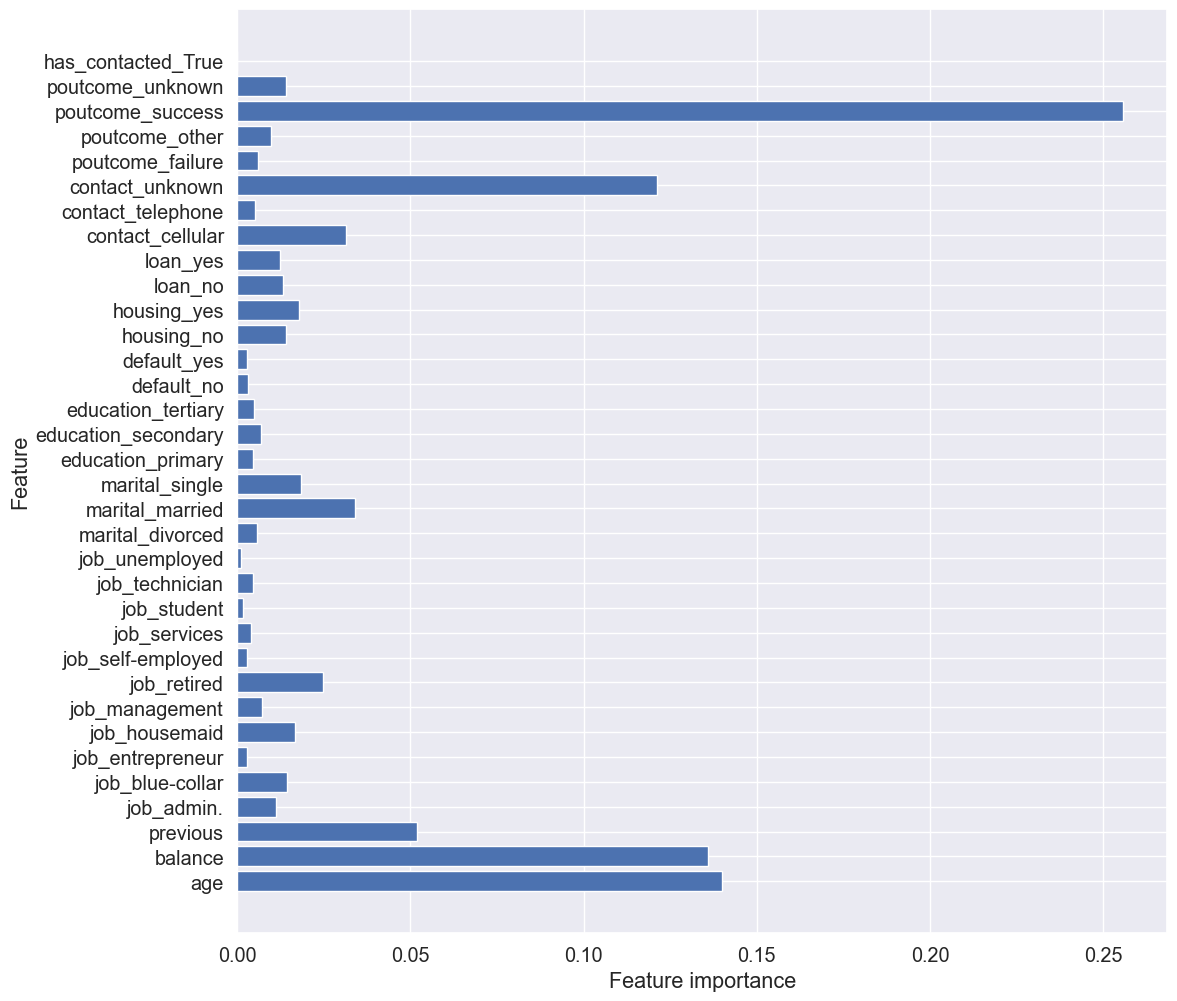

In [144]:
#Visualizing Feature Importance
def plot_feature_importances(model):
    n_features = X_trn.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), trn[features].columns.values) #trn.columns has list of all columns in our training data
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rf2)    

From the graph we can see that numeric features had the maximum feature imprtance.

**Conclusion:**


In this project, we learned how to utilize Machine Learning to predict if a customer will subscribe to a bank's term deposit scheme through its marketing campaign. We found that tree based models like Decision Tree and Random Forrest are giving a good performance on this dataset. This is explainable as usually tree based models perform well when number of features are not that large. **The best performing model was the hyperparameter tuned Random Forrest Model with F1 and ROC_AUC on the test dataset.**